### Analisis exploratorio de datos (EDA)

In [27]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Cargar dataset
df = pd.read_csv('Dataset-Telco-Customer-Churn.csv')

# Mostrar las primeras filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Resumen general del dataset

In [28]:
# Información general y tipos de datos
df.info()

# Estadísticas descriptivas para variables numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Análisis de variables categóricas principales

In [29]:
# Conteo de valores para variables categóricas seleccionadas
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    print(f'\nConteo de valores para {col}:')
    print(df[col].value_counts())
    print('-'*40)


Conteo de valores para gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------

Conteo de valores para SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
----------------------------------------

Conteo de valores para Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------

Conteo de valores para Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------

Conteo de valores para PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------

Conteo de valores para MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------

Conteo de valores para InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526


### Visualización de la distribución de la variable objetivo (Churn)

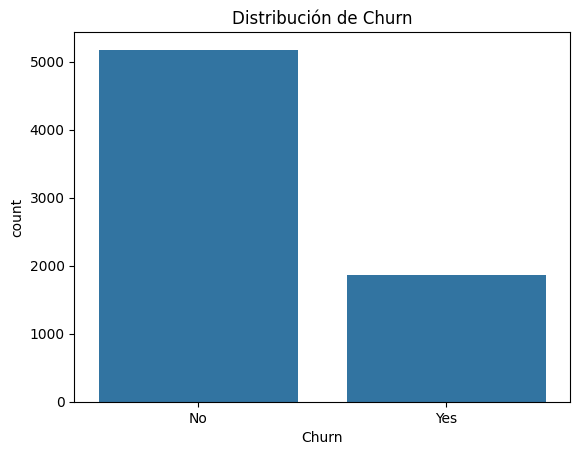

In [30]:
# Distribución de la variable Churn
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.show()

### Análisis de variables numéricas principales

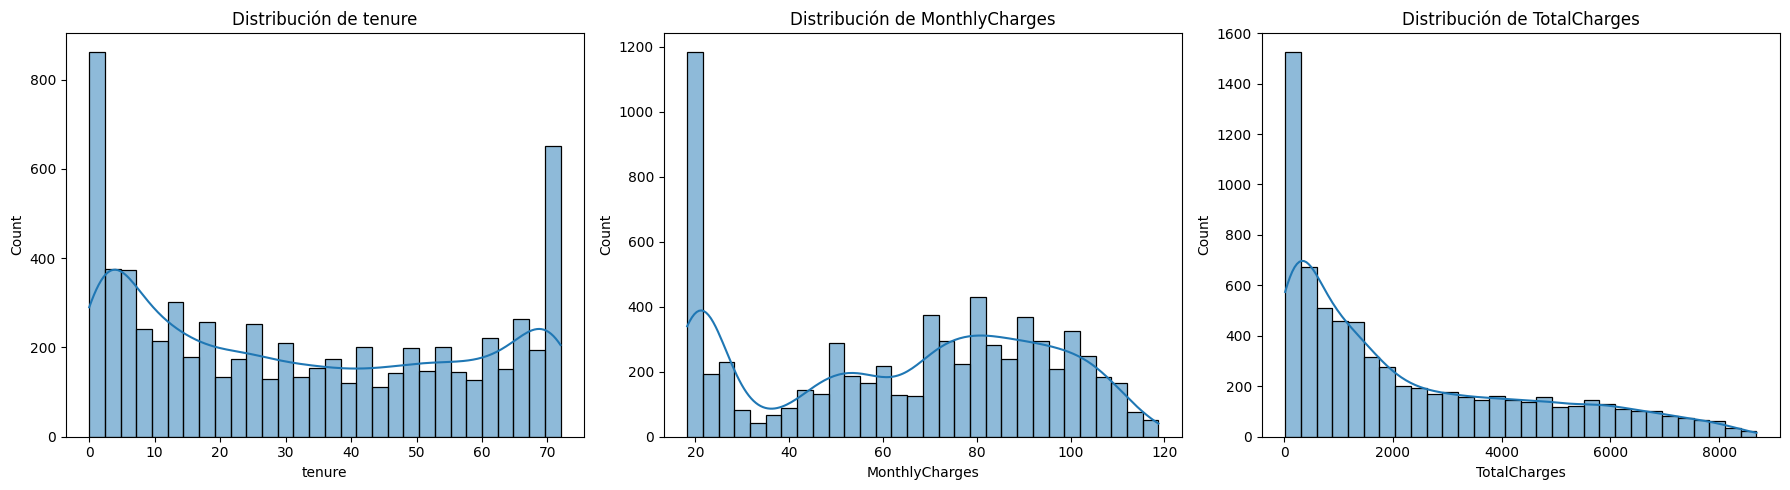

In [31]:
# Histograma de tenure, MonthlyCharges y TotalCharges
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['tenure'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribución de tenure')
sns.histplot(df['MonthlyCharges'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribución de MonthlyCharges')
sns.histplot(df['TotalCharges'].replace(' ', pd.NA).dropna().astype(float), bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribución de TotalCharges')
plt.tight_layout()
plt.show()

### Relación entre variables numéricas y Churn

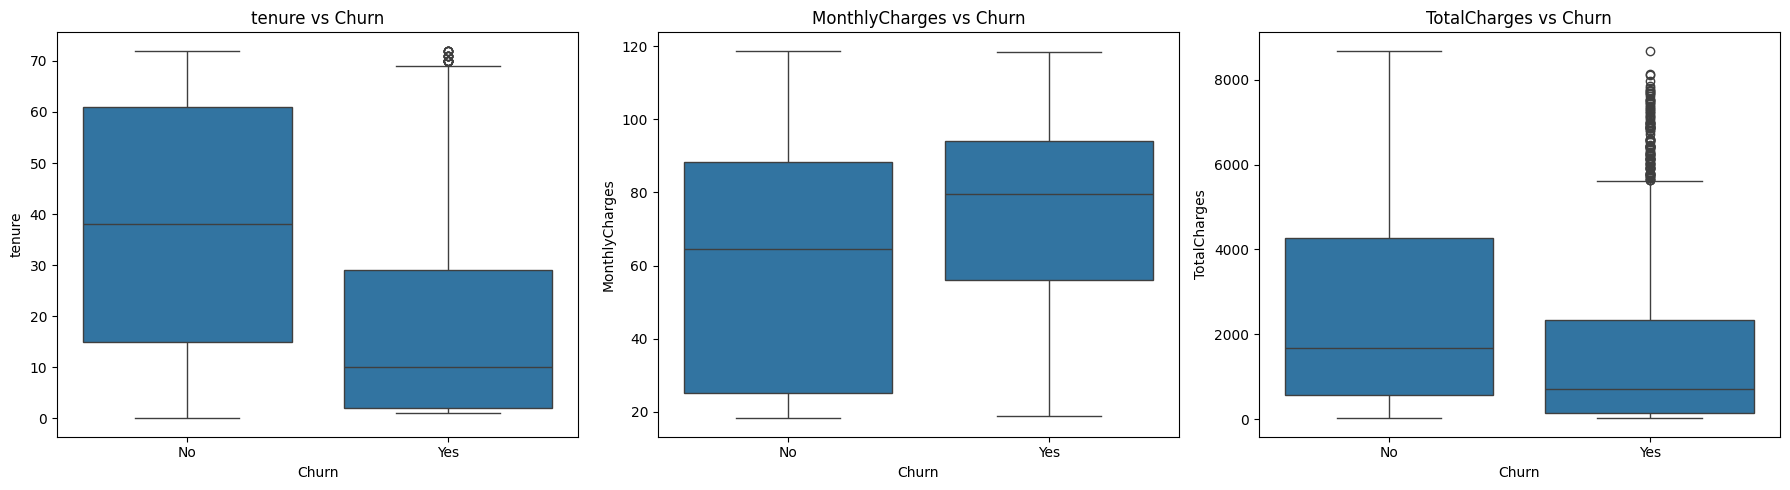

In [32]:
# Boxplots para tenure, MonthlyCharges y TotalCharges según Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('tenure vs Churn')
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('MonthlyCharges vs Churn')
sns.boxplot(x='Churn', y=df['TotalCharges'].replace(' ', pd.NA).dropna().astype(float), data=df, ax=axes[2])
axes[2].set_title('TotalCharges vs Churn')
plt.tight_layout()
plt.show()

# Limpieza y Preparación de Datos para Modelo de Churn

En este notebook realizaremos:
1. Limpieza de datos
2. Conversión de tipos de datos
3. Codificación de variables categóricas
4. Preparación del dataset final

In [33]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset
df = pd.read_csv('Dataset-Telco-Customer-Churn.csv')
print(f"Dimensiones del dataset original: {df.shape}")
print(f"\nPrimeras 5 filas:")
df.head()

Dimensiones del dataset original: (7043, 21)

Primeras 5 filas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Limpieza de datos

In [34]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

Valores faltantes por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tipos de datos:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
P

In [35]:
# Limpiar y convertir TotalCharges a numérico
print("Valores únicos en TotalCharges que no son numéricos:")
print(df['TotalCharges'].value_counts().head(10))

# Convertir espacios en blanco a NaN y luego a numérico
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar cuántos valores NaN tenemos
print(f"\nValores NaN en TotalCharges después de conversión: {df['TotalCharges'].isnull().sum()}")

# Para valores NaN en TotalCharges, podemos usar tenure * MonthlyCharges como aproximación
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

print(f"Valores NaN en TotalCharges después de imputación: {df['TotalCharges'].isnull().sum()}")

Valores únicos en TotalCharges que no son numéricos:
TotalCharges
20.2     11
         11
19.75     9
19.65     8
19.9      8
20.05     8
19.55     7
45.3      7
19.45     6
20.25     6
Name: count, dtype: int64

Valores NaN en TotalCharges después de conversión: 11
Valores NaN en TotalCharges después de imputación: 0


## Selección de features y exclusión de variables irrelevantes

In [36]:
# Excluir customerID (variable identificadora)
df_clean = df.drop('customerID', axis=1)

print(f"Dimensiones después de excluir customerID: {df_clean.shape}")
print(f"\nColumnas restantes:")
print(df_clean.columns.tolist())

Dimensiones después de excluir customerID: (7043, 20)

Columnas restantes:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## Codificación de variables categóricas

In [37]:
df_encoded = df_clean.copy()

categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas a codificar: {categorical_cols}")

target_col = 'Churn'
categorical_cols.remove(target_col)
print(f"\nVariables categóricas (sin target): {categorical_cols}")

Variables categóricas a codificar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Variables categóricas (sin target): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [38]:
# Codificar la variable objetivo (Churn) como binaria
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})
print(f"Distribución de Churn codificado:")
print(df_encoded['Churn'].value_counts())

Distribución de Churn codificado:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [39]:
# Codificar variables categóricas binarias manualmente
binary_mappings = {
    'gender': {'Male': 1, 'Female': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)
    print(f"Codificación de {col}: {df_encoded[col].value_counts().to_dict()}")

Codificación de gender: {1: 3555, 0: 3488}
Codificación de Partner: {0: 3641, 1: 3402}
Codificación de Dependents: {0: 4933, 1: 2110}
Codificación de PhoneService: {1: 6361, 0: 682}
Codificación de PaperlessBilling: {1: 4171, 0: 2872}


In [40]:
# Para variables categóricas con múltiples categorías, usar One-Hot Encoding
multi_categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                         'Contract', 'PaymentMethod']

print(f"Variables para One-Hot Encoding: {multi_categorical_cols}")

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=multi_categorical_cols, drop_first=True)

print(f"\nDimensiones después de One-Hot Encoding: {df_encoded.shape}")
print(f"\nNuevas columnas creadas:")
new_cols = [col for col in df_encoded.columns if any(cat in col for cat in multi_categorical_cols)]
print(new_cols)

Variables para One-Hot Encoding: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Dimensiones después de One-Hot Encoding: (7043, 31)

Nuevas columnas creadas:
['MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


## Verificación final del dataset preparado

In [41]:
# Verificar tipos de datos finales
print("Tipos de datos finales:")
print(df_encoded.dtypes.value_counts())

# Verificar valores faltantes
print(f"\nValores faltantes totales: {df_encoded.isnull().sum().sum()}")

# Mostrar estadísticas descriptivas
print(f"\nEstadísticas descriptivas del dataset final:")
df_encoded.describe()

Tipos de datos finales:
bool       21
int64       8
float64     2
Name: count, dtype: int64

Valores faltantes totales: 0

Estadísticas descriptivas del dataset final:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [42]:
# Mostrar las primeras filas del dataset final
print("Primeras 5 filas del dataset preparado:")
df_encoded.head()

Primeras 5 filas del dataset preparado:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [43]:
# Separar features (X) y target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Dimensiones de X (features): {X.shape}")
print(f"Dimensiones de y (target): {y.shape}")
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts())
print(f"\nPorcentaje de churn: {(y.sum() / len(y)) * 100:.2f}%")

Dimensiones de X (features): (7043, 30)
Dimensiones de y (target): (7043,)

Distribución de la variable objetivo:
Churn
0    5174
1    1869
Name: count, dtype: int64

Porcentaje de churn: 26.54%


## Guardar dataset preparado

In [44]:
df_encoded.to_csv('dataset_churn_preparado.csv', index=False)
print("Dataset preparado guardado como 'dataset_churn_preparado.csv'")

X.to_csv('X_features.csv', index=False)
y.to_csv('y_target.csv', index=False)
print("Features (X) guardadas como 'X_features.csv'")
print("Target (y) guardado como 'y_target.csv'")

Dataset preparado guardado como 'dataset_churn_preparado.csv'
Features (X) guardadas como 'X_features.csv'
Target (y) guardado como 'y_target.csv'


## Resumen de la preparación de datos

### Transformaciones realizadas:
1. **Limpieza de TotalCharges**: Convertido de object a float64, imputación de valores faltantes
2. **Exclusión de customerID**: Variable identificadora sin valor predictivo
3. **Codificación de variable objetivo**: Churn (No=0, Yes=1)
4. **Codificación binaria**: gender, Partner, Dependents, PhoneService, PaperlessBilling
5. **One-Hot Encoding**: Variables categóricas con múltiples categorías

# Creación de 5 Nuevas Variables (Features) para el Modelo de Churn

Hemos creado 5 nuevas variables que aporten valor predictivo al modelo:
1. **tenure_segment**: Segmentación de la duración del cliente
2. **avg_monthly_charge**: Gasto promedio mensual real
3. **num_services**: Número de servicios adicionales contratados
4. **is_month_to_month**: Indicador de contrato mes a mes
5. **is_payment_automatic**: Indicador de método de pago automático

In [45]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset original (antes de la codificación)
df = pd.read_csv('Dataset-Telco-Customer-Churn.csv')

# Limpiar TotalCharges como hicimos antes
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

print(f"Dimensiones del dataset: {df.shape}")
print(f"\nPrimeras 5 filas:")
df.head()

Dimensiones del dataset: (7043, 21)

Primeras 5 filas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Variable: tenure_segment (Segmentación de duración del cliente)

Estadísticas de tenure:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


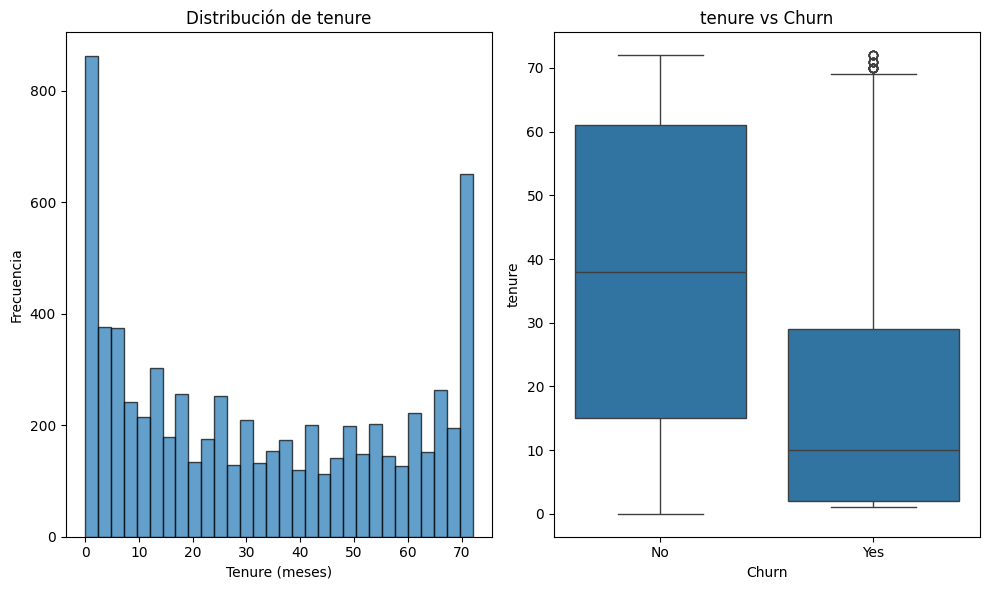

In [46]:
# Analizar la distribución de tenure para definir segmentos
print("Estadísticas de tenure:")
print(df['tenure'].describe())

# Visualizar distribución
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['tenure'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribución de tenure')
plt.xlabel('Tenure (meses)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('tenure vs Churn')
plt.tight_layout()
plt.show()

In [47]:
# Crear segmentos de tenure basados en cuartiles
def create_tenure_segment(tenure):
    if tenure <= 12:
        return 'Nuevo'  # 0-12 meses
    elif tenure <= 36:
        return 'Medio'  # 13-36 meses
    else:
        return 'Antiguo'  # 37+ meses

df['tenure_segment'] = df['tenure'].apply(create_tenure_segment)

print("Distribución de tenure_segment:")
print(df['tenure_segment'].value_counts())

print("\nChurn rate por segmento de tenure:")
churn_by_segment = df.groupby('tenure_segment')['Churn'].apply(lambda x: (x == 'Yes').mean())
print(churn_by_segment)

Distribución de tenure_segment:
tenure_segment
Antiguo    3001
Nuevo      2186
Medio      1856
Name: count, dtype: int64

Churn rate por segmento de tenure:
tenure_segment
Antiguo    0.119294
Medio      0.255388
Nuevo      0.474382
Name: Churn, dtype: float64


## 2. Variable: avg_monthly_charge (Gasto promedio mensual real)

Estadísticas de avg_monthly_charge:
count    7043.000000
mean       58.990789
std        30.579745
min         0.000000
25%        26.041493
50%        60.937879
75%        84.830742
max       118.969863
Name: avg_monthly_charge, dtype: float64

Comparación con MonthlyCharges original:
Correlación entre avg_monthly_charge y MonthlyCharges: 0.956


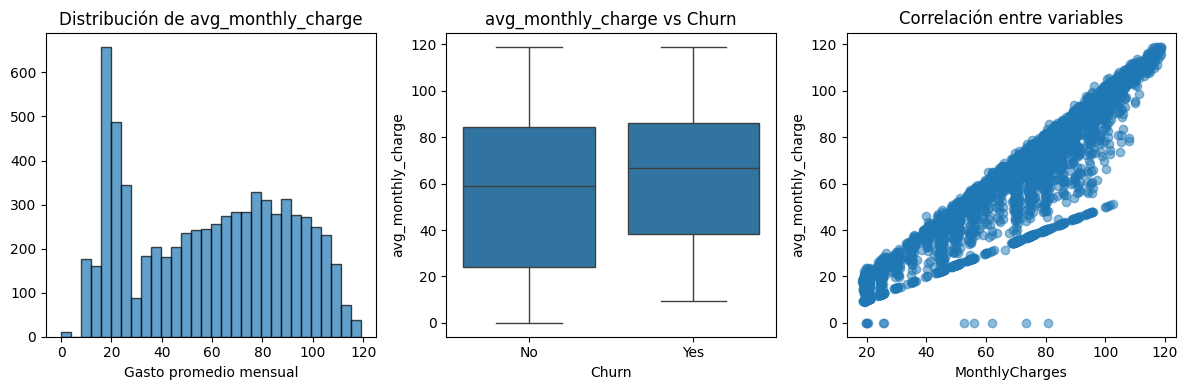

In [48]:
# Crear variable de gasto promedio mensual real
# Usamos (tenure + 1) para evitar división por cero en clientes con tenure = 0
df['avg_monthly_charge'] = df['TotalCharges'] / (df['tenure'] + 1)

print("Estadísticas de avg_monthly_charge:")
print(df['avg_monthly_charge'].describe())

# Comparar con MonthlyCharges original
print("\nComparación con MonthlyCharges original:")
print(f"Correlación entre avg_monthly_charge y MonthlyCharges: {df['avg_monthly_charge'].corr(df['MonthlyCharges']):.3f}")

# Visualizar
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['avg_monthly_charge'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribución de avg_monthly_charge')
plt.xlabel('Gasto promedio mensual')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='avg_monthly_charge', data=df)
plt.title('avg_monthly_charge vs Churn')

plt.subplot(1, 3, 3)
plt.scatter(df['MonthlyCharges'], df['avg_monthly_charge'], alpha=0.5)
plt.xlabel('MonthlyCharges')
plt.ylabel('avg_monthly_charge')
plt.title('Correlación entre variables')
plt.tight_layout()
plt.show()

## 3. Variable: num_services (Número de servicios adicionales)

In [49]:
# Definir servicios adicionales a contar
services_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

print("Servicios a considerar:")
for col in services_cols:
    print(f"{col}: {df[col].value_counts().to_dict()}")
    print()

Servicios a considerar:
OnlineSecurity: {'No': 3498, 'Yes': 2019, 'No internet service': 1526}

OnlineBackup: {'No': 3088, 'Yes': 2429, 'No internet service': 1526}

DeviceProtection: {'No': 3095, 'Yes': 2422, 'No internet service': 1526}

TechSupport: {'No': 3473, 'Yes': 2044, 'No internet service': 1526}

StreamingTV: {'No': 2810, 'Yes': 2707, 'No internet service': 1526}

StreamingMovies: {'No': 2785, 'Yes': 2732, 'No internet service': 1526}



Distribución de num_services:
num_services
0    2219
1     966
2    1033
3    1118
4     852
5     571
6     284
Name: count, dtype: int64

Churn rate por número de servicios:
num_services
0    0.214060
1    0.457557
2    0.358180
3    0.273703
4    0.223005
5    0.124343
6    0.052817
Name: Churn, dtype: float64


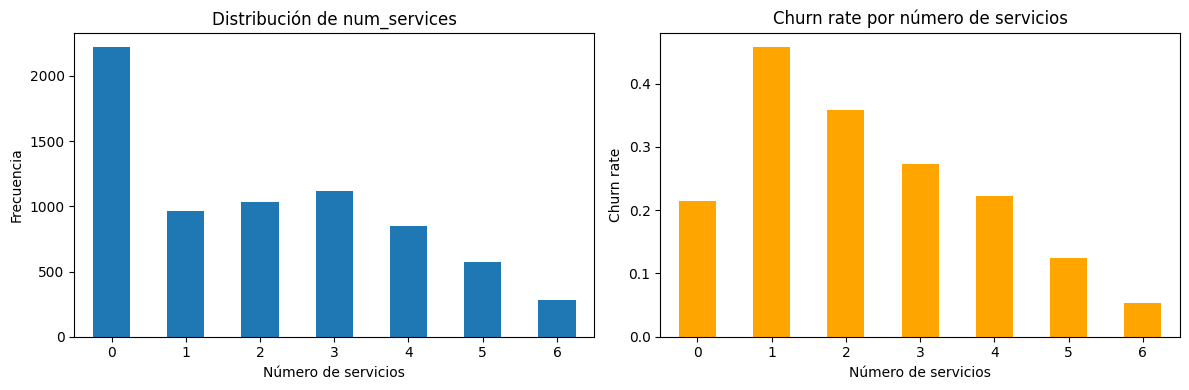

In [50]:
# Crear función para contar servicios
def count_services(row):
    count = 0
    for service in services_cols:
        if row[service] == 'Yes':
            count += 1
    return count

df['num_services'] = df.apply(count_services, axis=1)

print("Distribución de num_services:")
print(df['num_services'].value_counts().sort_index())

print("\nChurn rate por número de servicios:")
churn_by_services = df.groupby('num_services')['Churn'].apply(lambda x: (x == 'Yes').mean())
print(churn_by_services)

# Visualizar
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['num_services'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de num_services')
plt.xlabel('Número de servicios')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
churn_by_services.plot(kind='bar', color='orange')
plt.title('Churn rate por número de servicios')
plt.xlabel('Número de servicios')
plt.ylabel('Churn rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Variable: is_month_to_month (Indicador de contrato mes a mes)

In [51]:
# Analizar distribución de Contract
print("Distribución de Contract:")
print(df['Contract'].value_counts())

print("\nChurn rate por tipo de contrato:")
churn_by_contract = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean())
print(churn_by_contract)

Distribución de Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Churn rate por tipo de contrato:
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


Distribución de is_month_to_month:
is_month_to_month
1    3875
0    3168
Name: count, dtype: int64

Churn rate por tipo de contrato (binario):
No mes a mes (0): 0.06755050505050506
Mes a mes (1): 0.4270967741935484


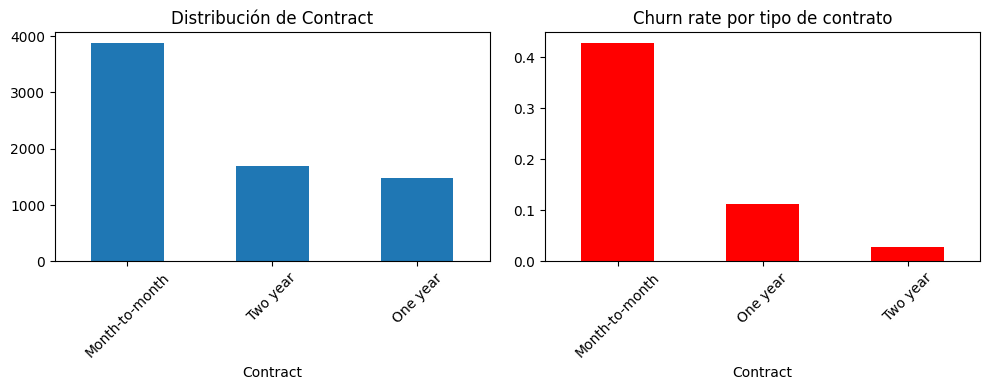

In [52]:
# Crear variable binaria para contrato mes a mes
df['is_month_to_month'] = (df['Contract'] == 'Month-to-month').astype(int)

print("Distribución de is_month_to_month:")
print(df['is_month_to_month'].value_counts())

print("\nChurn rate por tipo de contrato (binario):")
churn_by_contract_binary = df.groupby('is_month_to_month')['Churn'].apply(lambda x: (x == 'Yes').mean())
print("No mes a mes (0):", churn_by_contract_binary[0])
print("Mes a mes (1):", churn_by_contract_binary[1])

# Visualizar
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Contract'].value_counts().plot(kind='bar')
plt.title('Distribución de Contract')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
churn_by_contract.plot(kind='bar', color='red')
plt.title('Churn rate por tipo de contrato')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Variable: is_payment_automatic (Indicador de método de pago automático)

In [53]:
# Analizar distribución de PaymentMethod
print("Distribución de PaymentMethod:")
print(df['PaymentMethod'].value_counts())

print("\nChurn rate por método de pago:")
churn_by_payment = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean())
print(churn_by_payment)

Distribución de PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Churn rate por método de pago:
PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64


Distribución de is_payment_automatic:
is_payment_automatic
0    3977
1    3066
Name: count, dtype: int64

Churn rate por tipo de pago (binario):
No automático (0): 0.34674377671611767
Automático (1): 0.1598173515981735


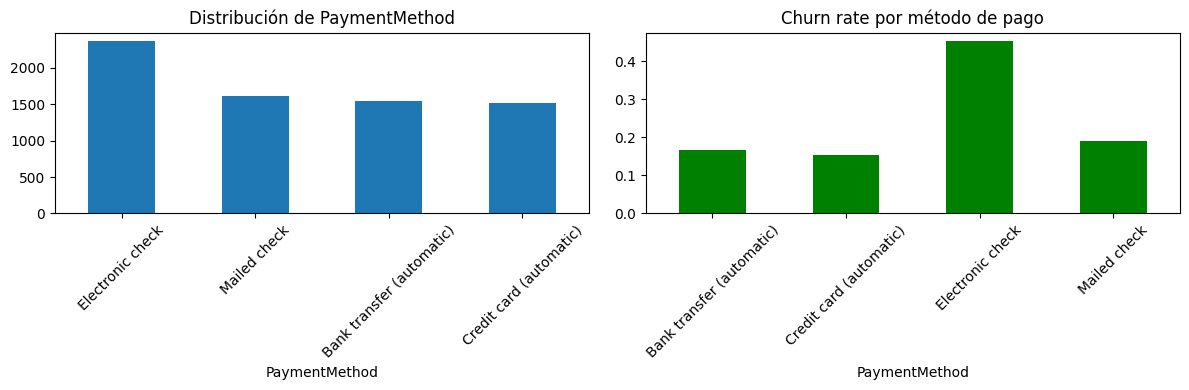

In [54]:
# Crear variable binaria para método de pago automático
automatic_methods = ['Bank transfer (automatic)', 'Credit card (automatic)']
df['is_payment_automatic'] = df['PaymentMethod'].isin(automatic_methods).astype(int)

print("Distribución de is_payment_automatic:")
print(df['is_payment_automatic'].value_counts())

print("\nChurn rate por tipo de pago (binario):")
churn_by_payment_binary = df.groupby('is_payment_automatic')['Churn'].apply(lambda x: (x == 'Yes').mean())
print("No automático (0):", churn_by_payment_binary[0])
print("Automático (1):", churn_by_payment_binary[1])

# Visualizar
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['PaymentMethod'].value_counts().plot(kind='bar')
plt.title('Distribución de PaymentMethod')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
churn_by_payment.plot(kind='bar', color='green')
plt.title('Churn rate por método de pago')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Resumen de las 5 nuevas variables creadas

In [55]:
# Mostrar las 5 nuevas variables
new_features = ['tenure_segment', 'avg_monthly_charge', 'num_services', 'is_month_to_month', 'is_payment_automatic']

print("Resumen de las 5 nuevas variables:")
print("="*50)

for feature in new_features:
    print(f"\n{feature.upper()}:")
    if df[feature].dtype == 'object':
        print(df[feature].value_counts())
    else:
        print(df[feature].describe())
    
    # Mostrar churn rate
    if feature == 'tenure_segment':
        churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean())
    else:
        churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean())
    print(f"Churn rate por {feature}:")
    print(churn_rate)
    print("-" * 30)

Resumen de las 5 nuevas variables:

TENURE_SEGMENT:
tenure_segment
Antiguo    3001
Nuevo      2186
Medio      1856
Name: count, dtype: int64
Churn rate por tenure_segment:
tenure_segment
Antiguo    0.119294
Medio      0.255388
Nuevo      0.474382
Name: Churn, dtype: float64
------------------------------

AVG_MONTHLY_CHARGE:
count    7043.000000
mean       58.990789
std        30.579745
min         0.000000
25%        26.041493
50%        60.937879
75%        84.830742
max       118.969863
Name: avg_monthly_charge, dtype: float64
Churn rate por avg_monthly_charge:
avg_monthly_charge
0.000000      0.0
9.183333      0.0
9.400000      0.0
9.425000      0.5
9.433333      1.0
             ... 
118.768493    0.0
118.800685    0.0
118.801613    0.0
118.954861    0.0
118.969863    1.0
Name: Churn, Length: 6653, dtype: float64
------------------------------

NUM_SERVICES:
count    7043.000000
mean        2.037910
std         1.847682
min         0.000000
25%         0.000000
50%         2.00000

Correlaciones con Churn:
avg_monthly_charge: 0.073
num_services: -0.088
is_month_to_month: 0.405
is_payment_automatic: -0.210


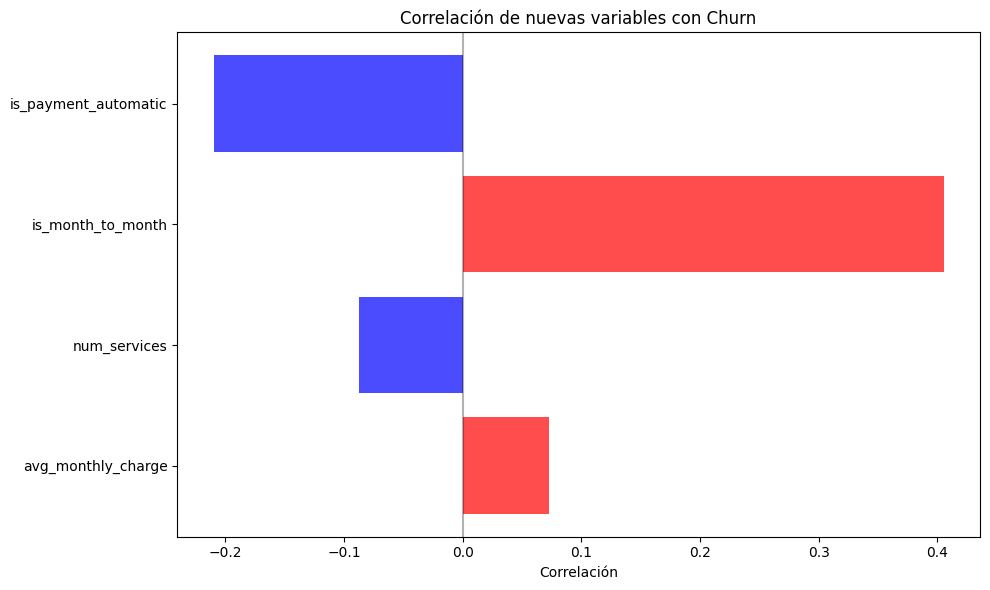

In [56]:
# Mostrar correlaciones entre las nuevas variables numéricas y churn
numeric_new_features = ['avg_monthly_charge', 'num_services', 'is_month_to_month', 'is_payment_automatic']

# Convertir Churn a numérico para correlación
df['Churn_numeric'] = (df['Churn'] == 'Yes').astype(int)

print("Correlaciones con Churn:")
correlations = {}
for feature in numeric_new_features:
    corr = df[feature].corr(df['Churn_numeric'])
    correlations[feature] = corr
    print(f"{feature}: {corr:.3f}")

# Visualizar correlaciones
plt.figure(figsize=(10, 6))
features_corr = list(correlations.keys())
values_corr = list(correlations.values())
colors = ['red' if x > 0 else 'blue' for x in values_corr]

plt.barh(features_corr, values_corr, color=colors, alpha=0.7)
plt.title('Correlación de nuevas variables con Churn')
plt.xlabel('Correlación')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Guardar dataset con las nuevas variables

In [57]:
# Guardar dataset con las nuevas variables
df.to_csv('dataset_con_nuevas_variables.csv', index=False)
print("Dataset con nuevas variables guardado como 'dataset_con_nuevas_variables.csv'")

print(f"\nDimensiones finales del dataset: {df.shape}")
print(f"\nNuevas variables creadas: {new_features}")

# Mostrar las primeras filas con las nuevas variables
print("\nPrimeras 5 filas con las nuevas variables:")
columns_to_show = ['customerID', 'Churn'] + new_features
df[columns_to_show].head()

Dataset con nuevas variables guardado como 'dataset_con_nuevas_variables.csv'

Dimensiones finales del dataset: (7043, 27)

Nuevas variables creadas: ['tenure_segment', 'avg_monthly_charge', 'num_services', 'is_month_to_month', 'is_payment_automatic']

Primeras 5 filas con las nuevas variables:


,customerID,Churn,tenure_segment,avg_monthly_charge,num_services,is_month_to_month,is_payment_automatic
0,7590-VHVEG,No,Nuevo,14.925000,1,1,0
1,5575-GNVDE,No,Medio,53.985714,2,0,0
2,3668-QPYBK,Yes,Nuevo,36.050000,2,1,0
3,7795-CFOCW,No,Antiguo,40.016304,3,0,1
4,9237-HQITU,Yes,Nuevo,50.550000,0,1,0


## Resumen de las 5 nuevas variables creadas

### Variables creadas:

1. **tenure_segment**: Segmentación de clientes por duración
   - Nuevo (0-12 meses), Medio (13-36 meses), Antiguo (37+ meses)
   - Captura patrones no lineales en la relación tenure-churn

2. **avg_monthly_charge**: Gasto promedio mensual real
   - TotalCharges / (tenure + 1)
   - Normaliza el gasto por la duración real del cliente

3. **num_services**: Número de servicios adicionales contratados
   - Cuenta servicios: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
   - Refleja el nivel de compromiso del cliente

4. **is_month_to_month**: Indicador de contrato mes a mes
   - 1 si Contract = 'Month-to-month', 0 en caso contrario
   - Los contratos cortos suelen tener mayor churn

5. **is_payment_automatic**: Indicador de método de pago automático
   - 1 si PaymentMethod es automático (Bank transfer o Credit card automatic), 0 en caso contrario
   - Los pagos automáticos suelen asociarse a menor churn

### Próximo paso:
Estas 5 nuevas variables deben ser incluidas en el dataset final para el modelado junto con las variables originales seleccionadas.

In [59]:
# Aseguramos que TotalCharges sea numérico (a veces viene como string)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")



# 3. isFamily
df["isFamily"] = np.where(
    (df["Partner"] == "Yes") | (df["Dependents"] == "Yes"),
    1, 0
)

# 4. ChargesRatio
df["ChargesRatio"] = np.where(
    df["tenure"] > 0,
    df["MonthlyCharges"] / (df["TotalCharges"] / df["tenure"]),
    np.nan
)

# ✅ Vista previa de las nuevas columnas
print(df[["isFamily", "ChargesRatio"]].head())

   isFamily  ChargesRatio
0         1      1.000000
1         0      1.024768
2         0      0.995839
3         0      1.034089
4         0      0.932410
